In [2]:
import numpy as np
import pandas as pd

lockThroughputs = np.array([[17523717.260, 23621735.866, 53329259.558, 47328586.548, 53415581.041, 56980842.990], 
                            [15590099.303, 10762974.397, 8475885.328, 10191880.763, 52891861.677, 5881990.940],
                            [14942658.867, 9292536.929, 5576432.267, 10241944.163, 49535991.357, 4074534.897],
                            [14816880.575, 4340903.210, 4210607.829, 8185921.362, 47966844.255, 4426907.605]
                           ])

frame = pd.DataFrame(lockThroughputs)

frame.rename(index={0:'1 thread',1:'3 threads', 2:'5 threads', 3:'8 threads'}, 
             inplace=True)

frame.columns = ['AdaptiveBackoff', 'Q_CLH', 'CheckCheck', 'Q_MCS', 'SimpleBackOff', 'Vanilla']

frame

,AdaptiveBackoff,Q_CLH,CheckCheck,Q_MCS,SimpleBackOff,Vanilla
1 thread,1.752372e+07,2.362174e+07,5.332926e+07,4.732859e+07,5.341558e+07,5.698084e+07
3 threads,1.559010e+07,1.076297e+07,8.475885e+06,1.019188e+07,5.289186e+07,5.881991e+06
5 threads,1.494266e+07,9.292537e+06,5.576432e+06,1.024194e+07,4.953599e+07,4.074535e+06
8 threads,1.481688e+07,4.340903e+06,4.210608e+06,8.185921e+06,4.796684e+07,4.426908e+06


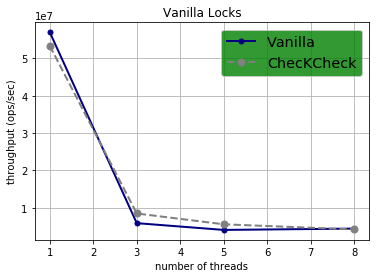

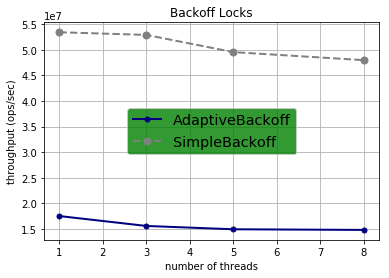

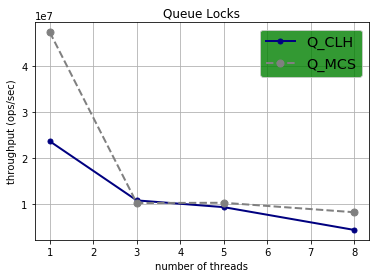

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = [1, 3, 5, 8]

adaptiveBackoff = [17523717.260, 15590099.303, 14942658.867, 14816880.575]
simpleBackoff = [53415581.041, 52891861.677, 49535991.357, 47966844.255]
vanilla = [56980842.990, 5881990.940, 4074534.897, 4426907.605]
checKCheck = [53329259.558, 8475885.328, 5576432.267, 4210607.829]
q_CLH = [23621735.866, 10762974.397, 9292536.929, 4340903.210]
q_MCS = [47328586.548, 10191880.763, 10241944.163, 8185921.362]

# ------------plotting the vanilla locks -------------------

fig1, ax1 = plt.subplots()

ax1.plot(t, vanilla, color='navy', marker='o', ls='-', linewidth=2, 
        markersize=5, label='Vanilla')

ax1.plot(t, checKCheck, color='grey', marker='o', ls='--', linewidth=2, 
        markersize=7, label='ChecKCheck')

ax1.set(xlabel='number of threads', ylabel='throughput (ops/sec)',
       title='Vanilla Locks')
ax1.grid()

legend = ax1.legend(loc='upper right', shadow=False, fontsize='x-large')
legend.get_frame().set_facecolor('green')


fig1.savefig("test1.png")
plt.show()

# ------------plotting the backoff locks -------------------

fig2, ax2 = plt.subplots()

ax2.plot(t, adaptiveBackoff, color='navy', marker='o', ls='-', linewidth=2, 
        markersize=5, label='AdaptiveBackoff')

ax2.plot(t, simpleBackoff, color='grey', marker='o', ls='--', linewidth=2, 
        markersize=7, label='SimpleBackoff')

ax2.set(xlabel='number of threads', ylabel='throughput (ops/sec)',
       title='Backoff Locks')
ax2.grid()

legend = ax2.legend(loc='center', shadow=False, fontsize='x-large')
legend.get_frame().set_facecolor('green')


fig2.savefig("test2.png")
plt.show()


# ------------plotting the queue locks -------------------

fig3, ax3 = plt.subplots()

ax3.plot(t, q_CLH, color='navy', marker='o', ls='-', linewidth=2, 
        markersize=5, label='Q_CLH')

ax3.plot(t, q_MCS, color='grey', marker='o', ls='--', linewidth=2, 
        markersize=7, label='Q_MCS')

ax3.set(xlabel='number of threads', ylabel='throughput (ops/sec)',
       title='Queue Locks')
ax3.grid()

legend = ax3.legend(loc='upper right', shadow=False, fontsize='x-large')
legend.get_frame().set_facecolor('green')


fig3.savefig("test3.png")
plt.show()